## Import libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Load dataset

In [10]:
data = pd.read_csv('../data/info_per_district_and_meters.csv')
df = pd.read_csv('../data/info_per_apartment.csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   distrito               256 non-null    object 
 1   mean_meters            256 non-null    float64
 2   advertised_rent_time   256 non-null    float64
 3   advertised_sell_time   256 non-null    float64
 4   size_rent              256 non-null    float64
 5   size_sell              256 non-null    float64
 6   €/meter_rent           256 non-null    float64
 7   €/meter_sell           256 non-null    float64
 8   apartments             256 non-null    int64  
 9   RB                     256 non-null    float64
 10  PER                    256 non-null    float64
 11  change_2014_2024_sell  256 non-null    float64
 12  change_2014_2024_rent  256 non-null    float64
 13  change_2021_2024_sell  256 non-null    float64
 14  change_2021_2024_rent  256 non-null    float64
 15  sell  

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29297 entries, 0 to 29296
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   distrito         29297 non-null  object 
 1   href             29297 non-null  object 
 2   price            29279 non-null  float64
 3   meters           29279 non-null  float64
 4   hab              27868 non-null  object 
 5   floor            25830 non-null  object 
 6   parking          11006 non-null  object 
 7   state            29297 non-null  object 
 8   description      29101 non-null  object 
 9   advertised_time  29297 non-null  float64
 10  mean_meters      29102 non-null  float64
 11  €/meter          29279 non-null  float64
dtypes: float64(5), object(7)
memory usage: 2.7+ MB


## Plot functions

In [13]:
def plot_aux(aux, _type, title, log=False, height=800):
    fig = px.bar(aux, x="distrito", y=_type, color="mean_meters", color_continuous_scale='blues')
    layout_dict = {
        'width': 1100,
        'height': height,
        'xaxis': dict(categoryorder='total descending'),
        'yaxis': dict(title="Percentage", type='log') if log else None,
        'title': title,
        'legend_title_text': None,
        'barmode': 'group',
        'template': 'plotly_white'
    }
    fig.update_layout(**layout_dict)
    fig.show()

def plt_scatter(aux, x, y, title, xlabel=None, ylabel=None):
    fig = px.scatter(aux, x=x, y=y, color='distrito')
    layout_dict= {
        'template': 'plotly_white',
        'title': title,
        'xaxis_title': xlabel,
        'yaxis_title': ylabel
    }
    fig.update_layout(**layout_dict)
    fig.show()

## Average square meters

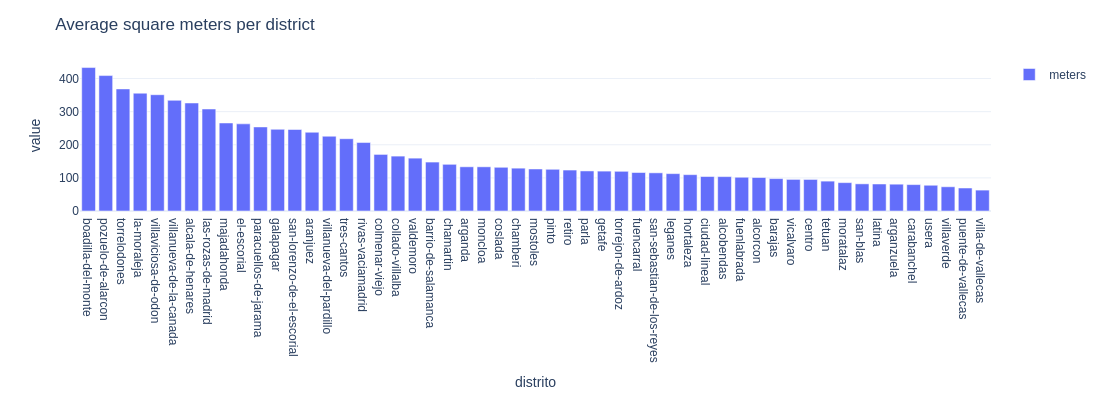

In [7]:
average_meters = df.groupby('distrito')['meters'].mean()
fig = px.bar(average_meters, color_continuous_scale=['blues'])
fig.update_layout(
    width=1100,
    height=400,
    title="Average square meters per district",
    xaxis={'categoryorder': 'total descending'},
    legend_title_text=None,
    template='plotly_white')
fig.show()

## Percentage of selling/renting apartments per district

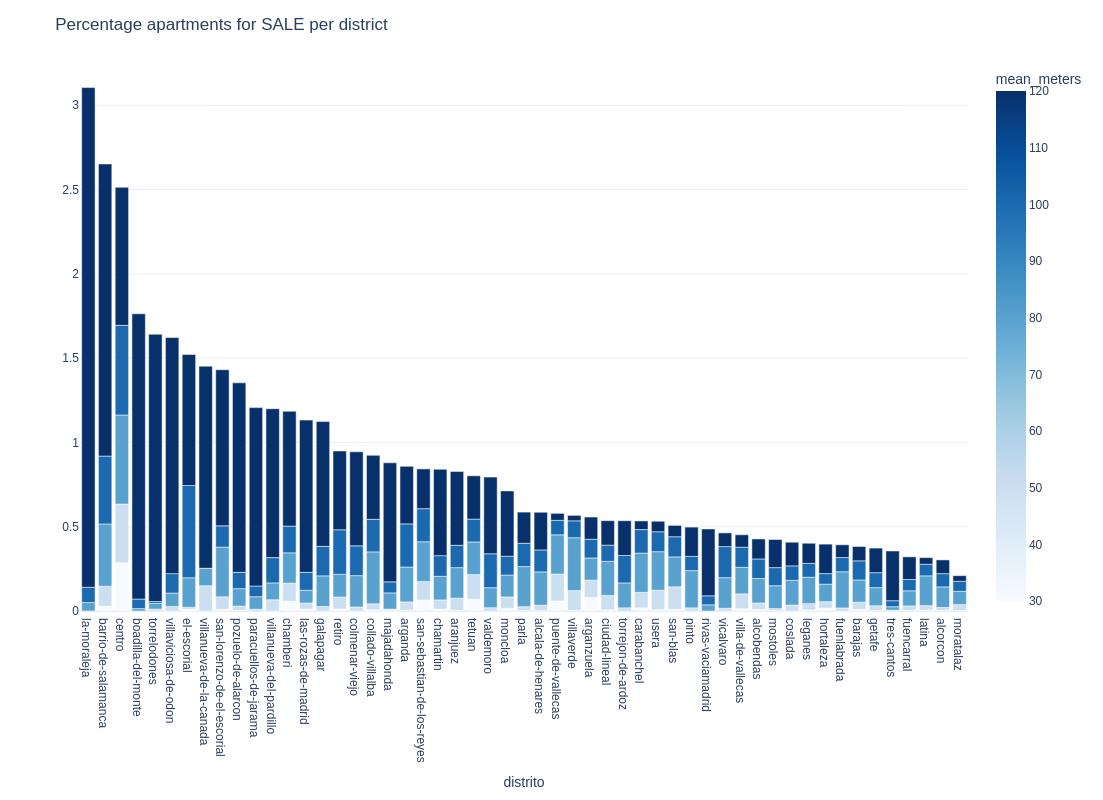

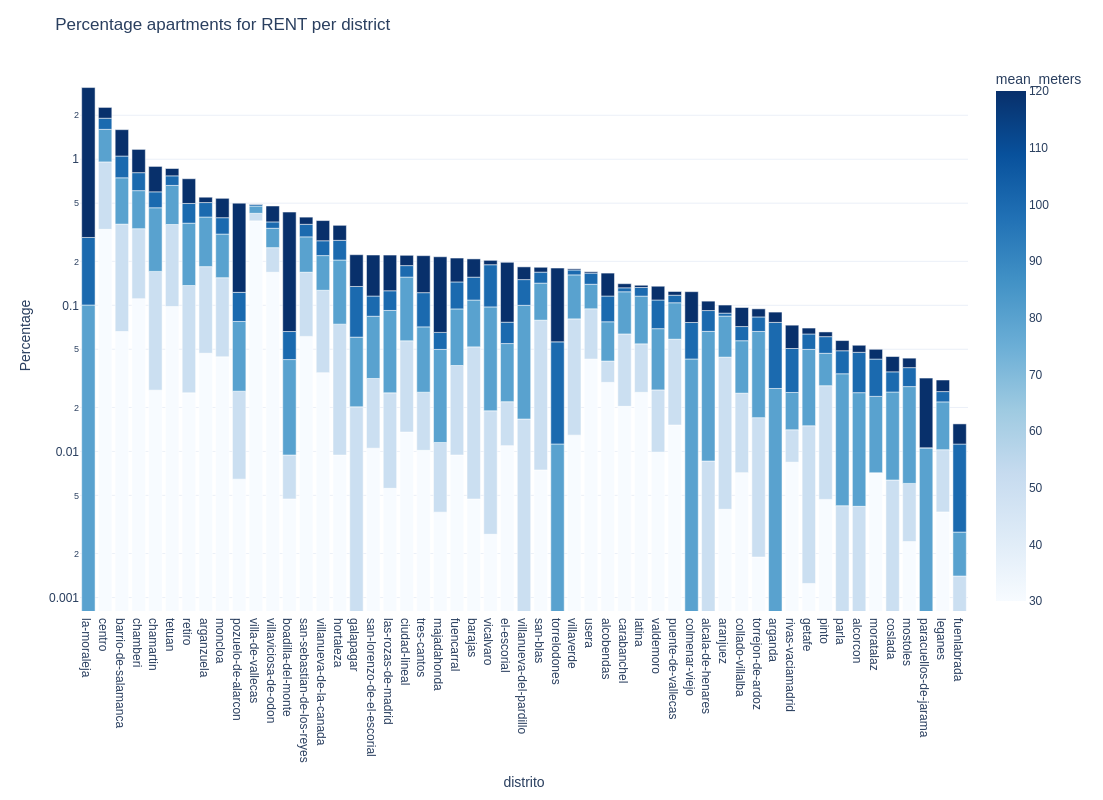

In [14]:
aux = data[['distrito', 'mean_meters', 'apartments', 'size_sell', 'size_rent']].copy()

aux.loc[:, '%sell'] = (aux['size_sell'] / aux['apartments']) * 100
aux.loc[:, '%rent'] = (aux['size_rent'] / aux['apartments']) * 100

title = 'Percentage apartments for SALE per district'
plot_aux(aux, "%sell", title=title)
title = 'Percentage apartments for RENT per district'
plot_aux(aux, "%rent", title=title, log=True)

## Average price per square meter (€/m²)

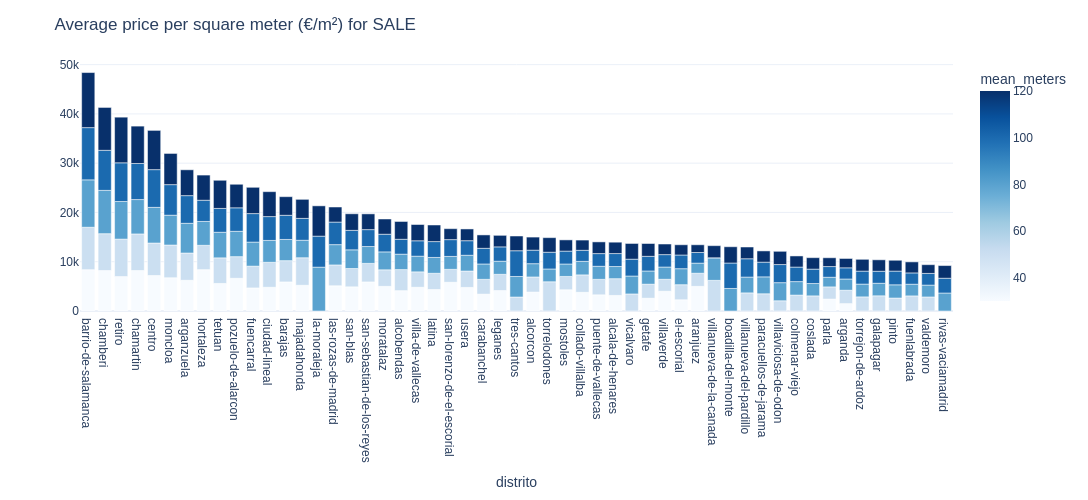

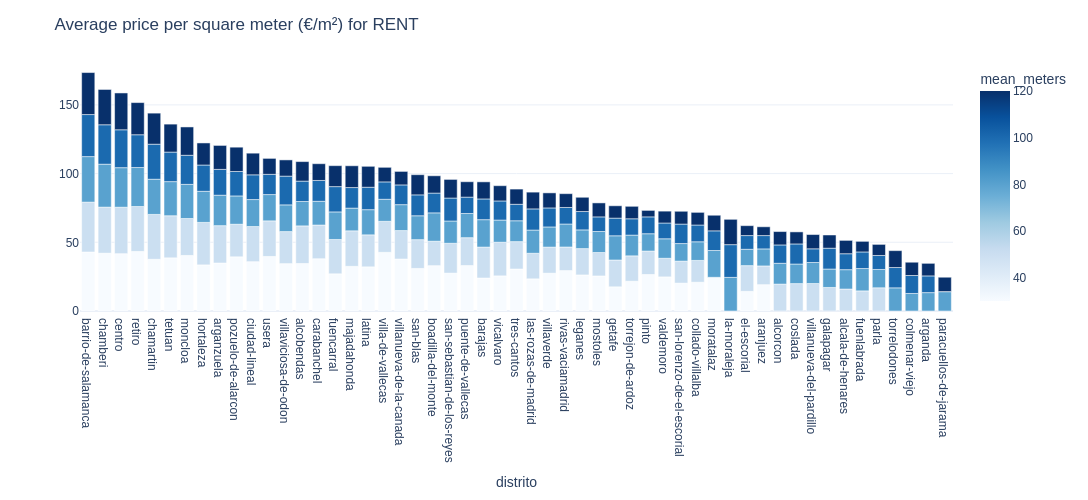

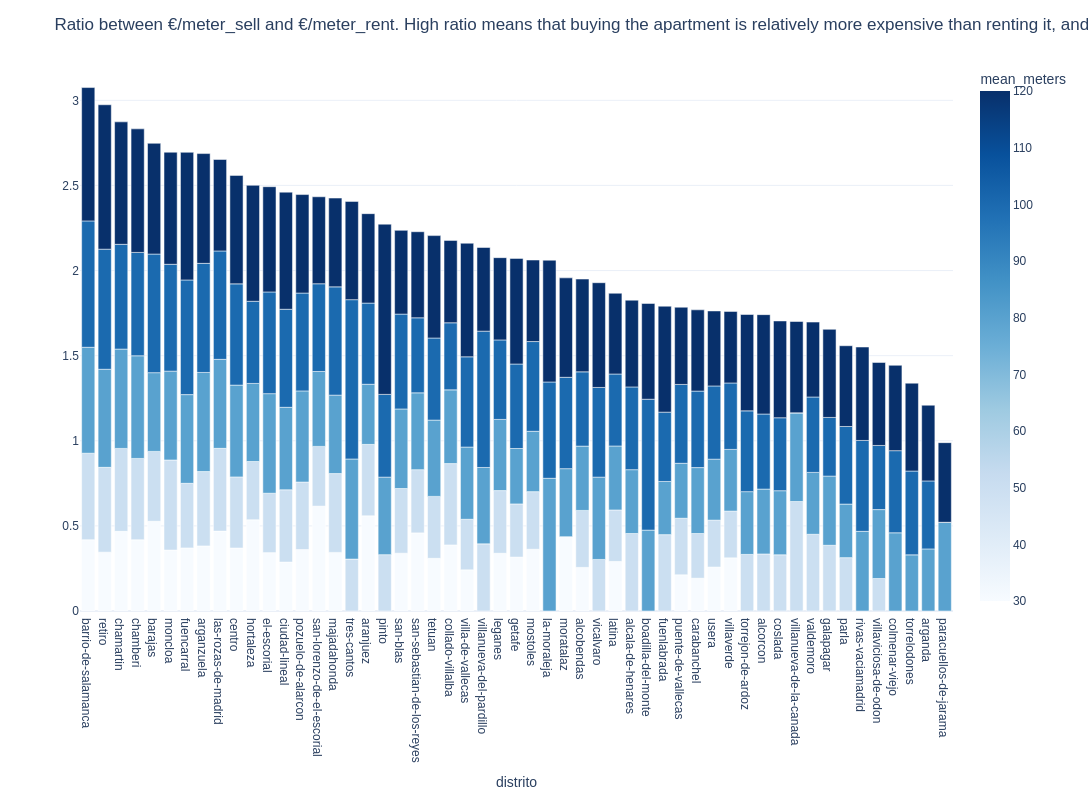

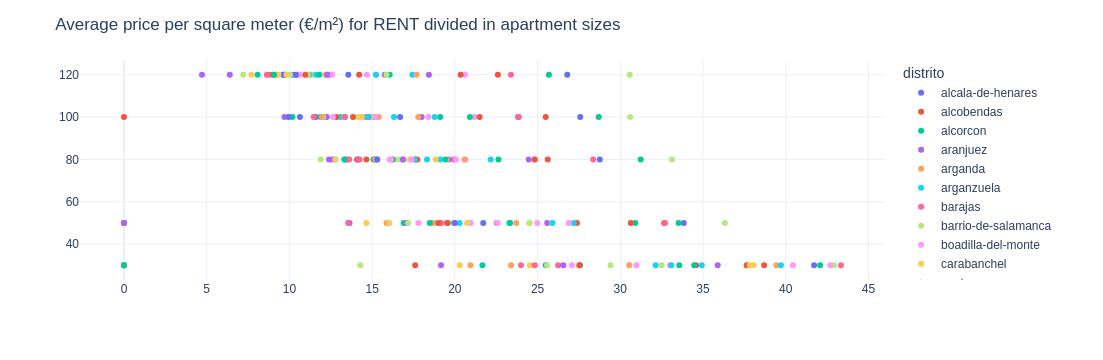

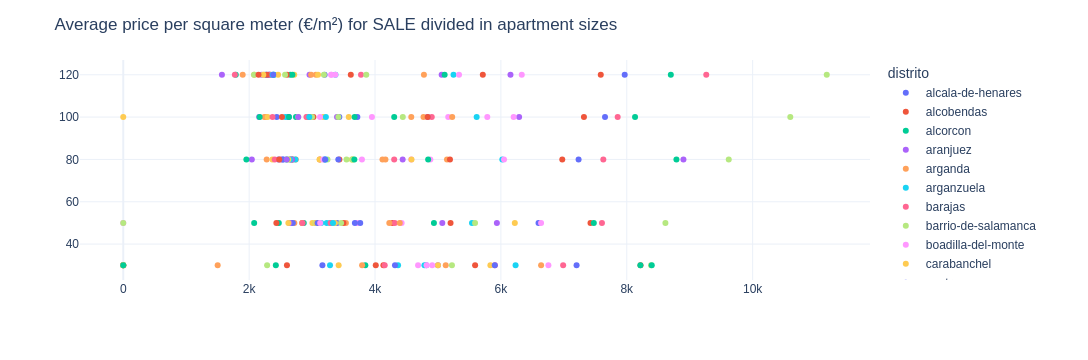

In [15]:
aux = data[['distrito', 'mean_meters', 'apartments', '€/meter_rent', '€/meter_sell']].copy()

title = 'Average price per square meter (€/m²) for SALE'
plot_aux(aux, "€/meter_sell", title=title, height=500)

title = 'Average price per square meter (€/m²) for RENT'
plot_aux(aux, "€/meter_rent", title=title, height=500)


def calculate_ratio(x):
    return x['€/meter_sell'] / x['€/meter_rent'] if x['€/meter_rent'] > 0 else 0
aux['ratio'] = aux.apply(calculate_ratio, axis=1)
aux['norm_ratio'] = (aux['ratio'] - aux['ratio'].min()) / (aux['ratio'].max() - aux['ratio'].min())

title = 'Ratio between €/meter_sell and €/meter_rent. High ratio means that buying the apartment is relatively more expensive than renting it, and viceversa'
plot_aux(aux, 'norm_ratio', title=title)


title = 'Average price per square meter (€/m²) for RENT divided in apartment sizes'
plt_scatter(data, x='€/meter_rent', y='mean_meters', title=title)
title = 'Average price per square meter (€/m²) for SALE divided in apartment sizes'
plt_scatter(data, x='€/meter_sell', y='mean_meters', title=title)

## Correlation between price and meters

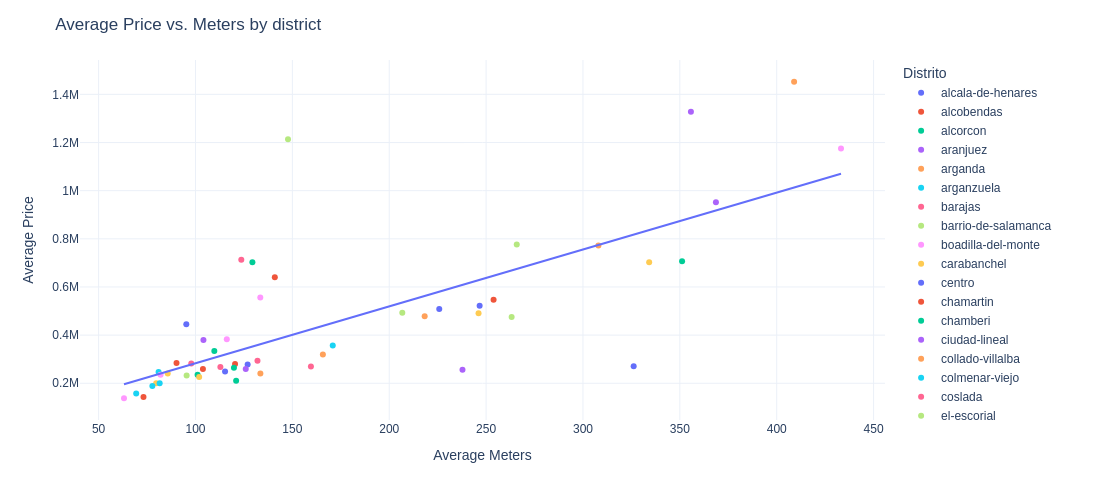

In [16]:
grouped = df.groupby('distrito').agg({'price': 'mean', 'meters': 'mean'}).reset_index()

slope, intercept = np.polyfit(grouped['meters'], grouped['price'], 1)
trend_x = np.linspace(grouped['meters'].min(), grouped['meters'].max(), 100)
trend_y = slope * trend_x + intercept

fig = px.scatter(grouped, x='meters', y='price', color='distrito')
fig.add_traces(px.line(x=trend_x, y=trend_y).data)
fig.update_layout(
    width=1000,
    height=500,
    title='Average Price vs. Meters by district',
    xaxis_title='Average Meters',
    yaxis_title='Average Price',
    legend_title='Distrito',
    template='plotly_white'
)

## Average advertisement time

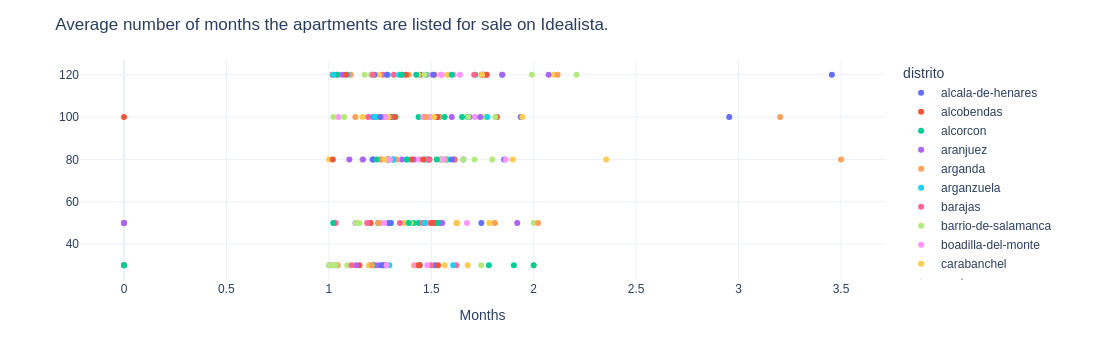

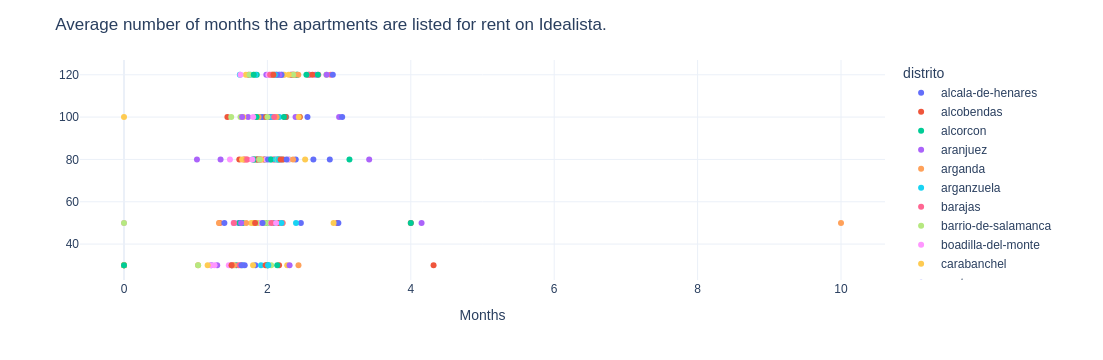

In [50]:
aux = data[['distrito', 'mean_meters', 'advertised_rent_time', 'advertised_sell_time']].copy()

title = 'Average number of months the apartments are listed for sale on Idealista.'
plt_scatter(aux, x='advertised_rent_time', y='mean_meters', title=title, xlabel='Months')
title = 'Average number of months the apartments are listed for rent on Idealista.'
plt_scatter(aux, x='advertised_sell_time', y='mean_meters', title=title, xlabel='Months')

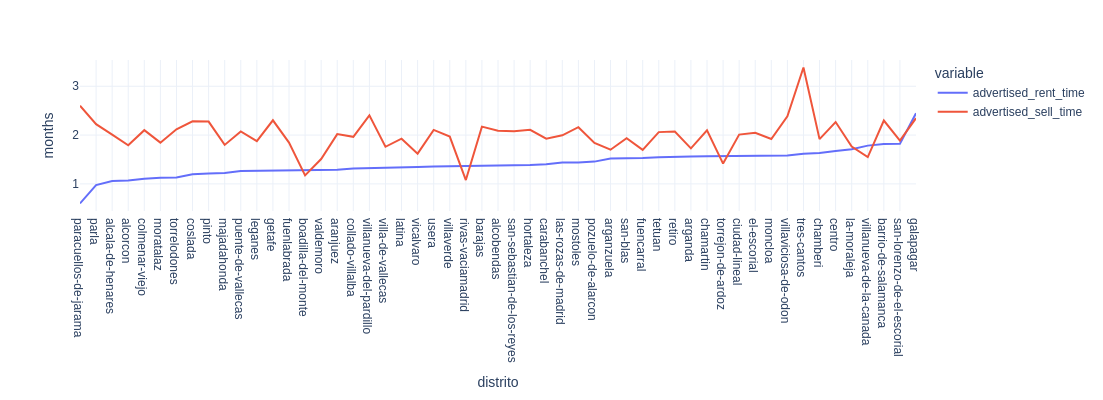

In [76]:
_sort = aux.groupby('distrito').agg({'advertised_rent_time': 'mean', 'advertised_sell_time': 'mean'}).reset_index().sort_values('advertised_rent_time')
title = 'Advertised selling time vs reting time'
fig = px.line(_sort, x='distrito', y=['advertised_rent_time', 'advertised_sell_time'])
fig.update_layout(height=400, template='plotly_white', yaxis_title='months')
fig.show()

## PER, PER adjusted and gross rental yield

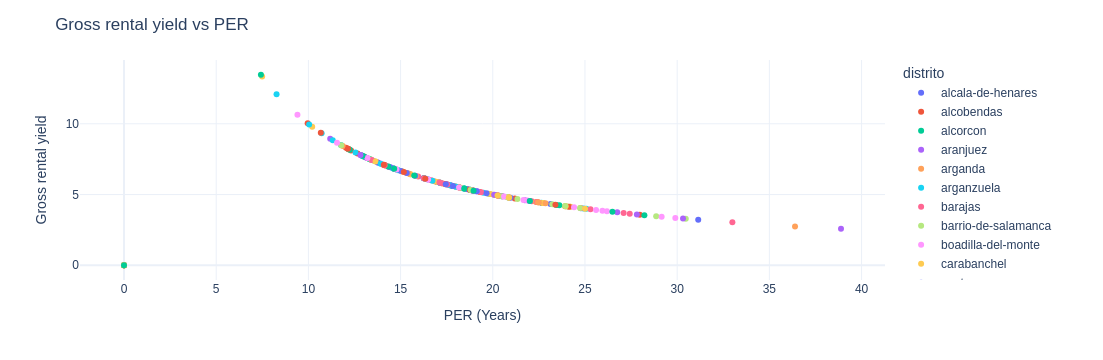

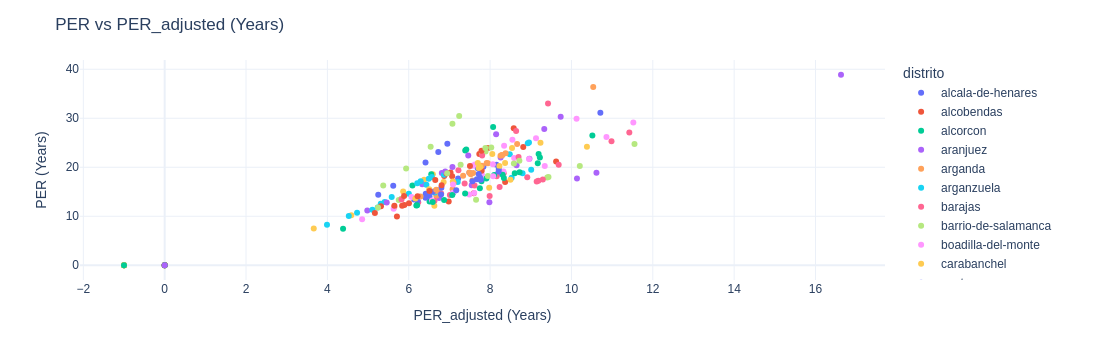

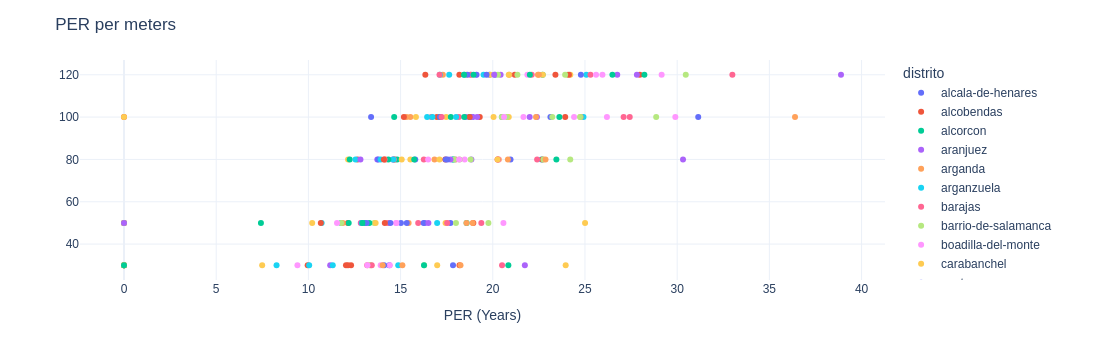

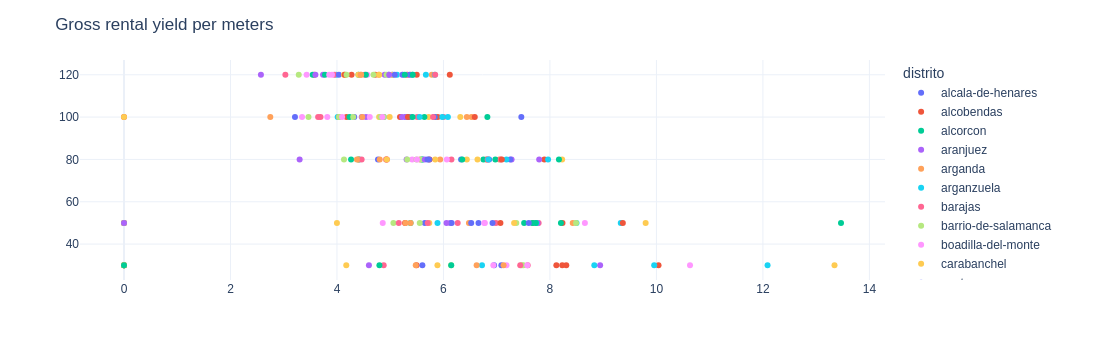

In [13]:
aux = data[['distrito', 'RB', 'PER', 'PER_adjusted', 'mean_meters']].copy()
title = 'Gross rental yield vs PER'
plt_scatter(aux, x='PER', y='RB', title=title, xlabel='PER (Years)', ylabel='Gross rental yield')

title = 'PER vs PER_adjusted (Years)'
plt_scatter(aux, x='PER_adjusted', y='PER', title=title, xlabel='PER_adjusted (Years)', ylabel='PER (Years)')

plt_scatter(aux, x='PER', y='mean_meters', title='PER per meters', xlabel='PER (Years)')
plt_scatter(aux, x='RB', y='mean_meters', title='Gross rental yield per meters', xlabel='')

## Compare change selling/renting rate 2014-2024

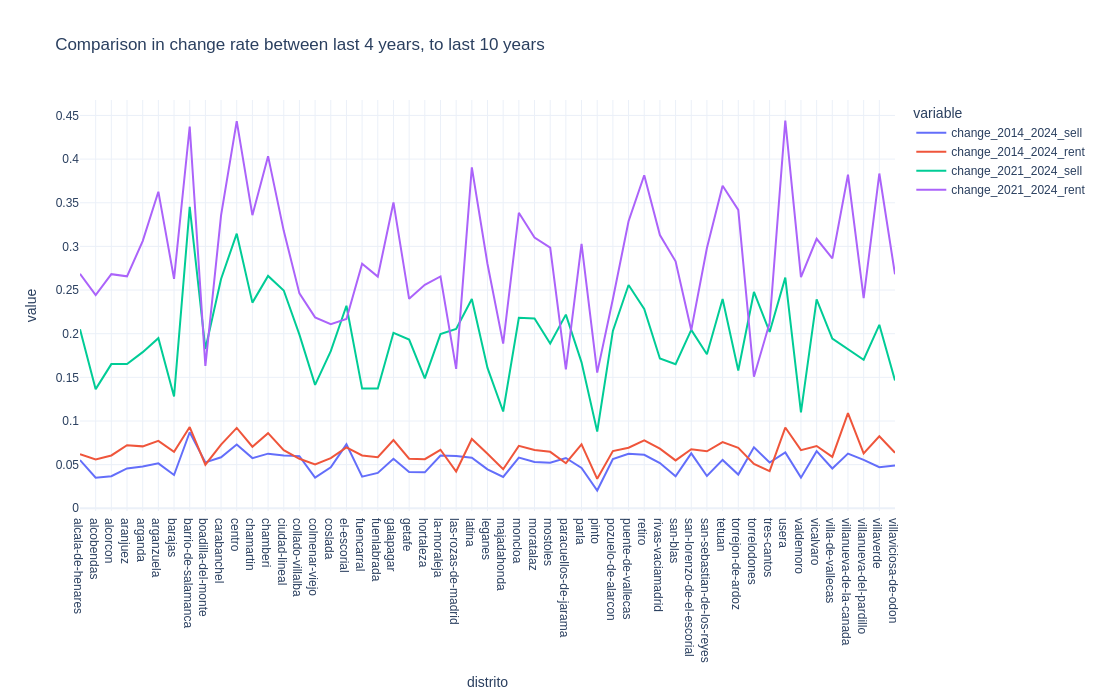

In [49]:
aux = data[['distrito', 'mean_meters', 'change_2014_2024_sell', 'change_2014_2024_rent', 'change_2021_2024_sell', 'change_2021_2024_rent']].copy()
aux = aux.drop_duplicates(subset='distrito', keep='first')

title = 'Comparison in change rate between last 4 years, to last 10 years'
fig = px.line(aux, 
              x='distrito', 
              y=['change_2014_2024_sell', 'change_2014_2024_rent', 'change_2021_2024_sell', 'change_2021_2024_rent'],
             title=title)
fig.update_layout(height=700, template='plotly_white')
fig.show()